# Entrega 3 - Clasificadores (Naive Bayes, KNN)

### Grupo 07:
     - Renzo Gambone C.I. 5.155.486-4
     - Germán Ouviña C.I. 4.823.566-1
     - Leandro Rodríguez C.I 4.691.736-4


## 1. Introducción
***
### 1.1. Objetivo
***
El objetivo de esta tarea fue implementar clasificadores basados en dos tipos de aprendizaje: **aprendizaje bayesiano** y **aprendizaje basado en casos**. Más especificamente, los modelos utilizados fueron **bayes sencillo** y **k vecinos más cercanos** respectivamente. Una vez generados distintos clasificadores en base a ciertos parámetros, se evaluó la performance de los mismos utilizando distintos tipos de métrica y comparando dichas evaluaciones para determinar cual modelo se ajustó mejor a cada escenario. Como agregado, se compararon los resultados obtenidos con los resultados obtenidos en el laboratorio anterior.

En términos formales, los parámetros del problema se reducen a lo siguiente:
- **Tarea *T*:** Clasificar ejemplos siguiendo cierto formato.
- **Experiencia *E*:** Conjunto de datos con ejemplos ya clasificados siguiendo cierto formato.
- **Performance *P*:** Múltiples tipos de medidas (las cuales se profundizan en la sección 3).

### 1.2. Entrega
***
La entrega de esta tarea consta de dos grandes componentes:
- **Informe** en formato de Jupyter Notebook (este informe).
- **Programa** que permite entrenar clasificadores, evaluar su desempeño y clasificar nuevos ejemplos.

El objetivo del informe es centralizar la información relativa a la construcción de los distintos modelos, así como los datos obtenidos mediante pruebas realizadas con varias configuraciones paramétricas. Como agregado opcional, se adjuntan algunos scripts para ayudar a la lectura o probar en tiempo real ciertas funcionalidades.

Por otra parte, el programa ofrece una interfaz en consola que permite entrenar y evaluar clasificadores acorde a múltiples configuraciones paramétricas. También se incluyen todas las herramientas desarrolladas en la anterior entrega, pudiendo entrenar y evaluar modelos basados en árboles o bosques de decisión. Si bien todas estas herramientas fueron pensadas para uso del grupo, en el archivo *README.md* se adjunta una sencilla guía de como utilizarlas.

### 1.3. Formato
***
En las siguientes secciones se especifica el diseño de cada modelo, justificando la toma de decisiones a la hora de construirlos y detallando las estrategias o algoritmos que fueron implementados para la configuración paramétrica, junto a las métricas utilizadas en la evaluación. Luego, se detalla la metodología de experimentación y con la misma los resultados obtenidos para cada modelo y cada conjunto de datos, habiendo entrenado con distintas configuraciones paramétricas. Finalmente se agregan conclusiones respecto a los resultados obtenidos.

Como detalle importante, dado que la consigna de la actual entrega presenta varias similitudes con la de la entrega anterior, se reutilizaron varios conceptos. A continuación se realiza una breve descripción del contenido de cada sección, especificando aquellas subsecciones que reutilizan contenido (a las cuales se les agrega también un asterisco en el título), con el objetivo de facilitar una lectura que tenga en cuenta el informe anterior.

La sección 2 (**Diseño**) reutiliza los conceptos de **preprocesamiento** y **evaluación** de la entrega anterior. No obstante, se agregan nuevas consideraciones al final de cada subsección. Con respecto al diseño de **modelos** y **algoritmos**, no se reutiliza nada al tratarse de modelos distintos.

La sección 3 (**Experimentación**) reutiliza la estructura de la tarea anterior, siguiendo una metodología similar. De todas formas, al tratarse de nuevos resultados, no se reutiliza más que la estructura de la tarea anterior. Además, se expande la metodología en cuestión, agregandose nuevas formas de experimentación.

La sección 4 (**Conclusiones**) cuenta con una nueva lista de conclusiones extraídas de la realización de esta tarea, por lo que no comparte nada más que ciertas comparaciones con la tarea anterior.

## 2. Diseño
***
En esta sección se detallan las características del diseño utilizado para construir el modelo, se profundizan las estrategias y algoritmos empleados en la configuración paramétrica y se tratan otros puntos como el procesamiento previo al entrenamiento y la evaluación posterior al mismo.

### 2.1. Modelo
***
La consigna propone la utilización y comparación de dos tipos de modelos basados en distintos métodos de aprendizaje supervisado. A continuación, se especifican las características de cada uno:

**Notas:**
* No se ahonda en dichas descripciones puesto que son conceptos trabajados en el teórico.
* Se utiliza notación matemática para visualizar fácilmente la definición de cada modelo.

#### 2.1.1. Bayes sencillo (Naive Bayes)
***
Para este escenario uno de los modelos propuestos es el de **bayes sencillo** (a partir de ahora denominado **naive bayes** o **NB**), un modelo bayesiano que, al asumir independencia entre cada atributo del conjunto de datos, "simplifica" la interpretación de las frecuencias o **probabilidades** de los valores de cada atributo y permite utilizar el *Teorema de Bayes* para clasificar nuevos ejemplos con probabilidad.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$
* $NB_D =$ Clasificador bayesiano generado en base a $D$
* Se representa una clasificación de un ejemplo $d \in D$ realizada por el clasificador bayesiano $NB_D$ como $NB_D(d) = (c, p) : c \in C_D$ y $p \in [0..1]$

#### 2.1.2. K vecinos más cercanos (KNN)
***
El otro modelo propuestos es el de **k vecinos más cercanos** (a partir de ahora denominado **KNN**), un modelo basados en casos, el cual representa el conjunto de datos como un espacio de **$n$ dimensiones** (siendo $n$ la cantidad de atributos) y clasifica nuevos ejemplos basandose en la clasificación de los $k$ vecinos más cercanos al ejemplo en cuestión, utilizando algún tipo de medida de distancia.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$
* $KNN_{(D,k)} =$ Clasificador de KNN generado en base a $D$ y evaluando los $k$ vecinos más cercanos
* Se representa una clasificación de un ejemplo $d \in D$ realizada por el clasificador $KNN_{(D,k)}$ como $KNN_{(D,k)}(d) = (c, p) : c \in C_D$ y $p \in [0..1]$

Los detalles sobre los algoritmos de entrenamiento y clasificación utilizados por cada modelo se expanden en la sección 2.3.


### 2.2. Preprocesamiento
***
Con los objetivos tanto de hacer viable como de mejorar la performance de entrenamiento, se realizaron ciertos cambios en el conjunto de datos a utilizar. A continuación, se listan los cambios realizados agrupandolos en base a motivación y área cambiada en el conjunto original.

**Notas:**
* Los cambios realizados en el conjunto de datos fueron hechos en memoria, sin modificar de forma alguna los archivos originales.
* Los cambios como *interpretación de atributos continuos*, *normalización de rangos*, etc. son inherentes a ciertos modelos y por lo tanto no se especifícan en esta sección, tratandose en la sección correspondiente a cada algoritmo.

#### 2.2.1. Optimización (Representación) (*)
***
La elección de la representación interna fue compleja, ya que se tuvo en cuenta tanto la performance como la facilidad a la hora de programar e interpretar el código. Siguiendo el ejemplo de la entrega anterior, se determinó la utilización del objeto **DataFrame** de la biblioteca *pandas*. Al principio trajo muchos problemas de performance (tanto en uso de memoria como en velocidad) pero al implementar técnicas ofrecidas por la biblioteca dichos problemas se palearon, generando eventualmente un uso de memoria reducido y un entrenamiento veloz.

#### 2.2.2. Estructura (Atributos) (*)
***
Originalmente se buscó mantener la estructura de atributos estática, con el fin de impactar lo menos posible en el entrenamiento y su posterior evaluación. No obstante, para el segundo conjunto de datos (detallado en la sección 2.4), fue necesario cambiar la estructura eliminando varios atributos y generando otros nuevos.

Más concretamente, el cambio realizado fue el proceso inverso al conocido como **one hot encoding**, ya que habia múltiples atributos que representaban "la idea" de un sólo atributo discreto. En múltiples problemas, la implementación de dicho algoritmo resulta de gran utilidad para mejorar el rendimiento tanto a nivel de performance como de clasificación, generando $x$ atributos binarios para $x$ posibles valores del atributo original. 

En el contexto de árboles de decisión, sucede lo opuesto: el aumento lineal en cantidad de atributos genera un aumento exponencial en el tamaño del árbol y en el tiempo de entrenamiento. Tomando esto en cuenta, se deshizo el **one hot encoding**, tratando a los atributos generados como continuos (este punto junto a sus implicancias son expandidos en las siguientes secciones).

### 2.3. Algoritmo
***
En la siguiente sección se centralizan todas las especificaciones relativas a los algoritmos empleados, tanto para entrenar como para clasificar.

**Notas:**
* Se separa la especificación para **NB** y **KNN**.
* Se hace referencia a puntos mencionados en secciones anteriores, sin entrar en detalle en lo que ya fue explicado.

#### 2.3.1. Especificación - Naive Bayes
***
Un clasificador **Naive Bayes** trabaja con **atributos discretos** y una **clasificación discreta**. En este aspecto, no difiere de los **árboles de decisión** utilizados en la anterior tarea. No obstante, tanto la forma de *entrenar* como de *clasificar* si difiere, ya que se fundamenta en otros principios.

Como se mencionó anteriormente, **Naive Bayes** es un modelo bayesiano, por lo que utiliza determina probabilidades en base al conjunto de entrenamiento y clasifica nuevos ejemplos sirviendose de las mismas y del *Teorema de Bayes*. Debido a esto, cuenta con sus propias particularidades y distintos parámetros a configurar.

A continuación se tratan dichas particularidades, así como el algoritmo de entrenamiento y el de clasificación.

##### 2.3.1.1. Algoritmo de entrenamiento
***
El algoritmo de entrenamiento implementado no difiere de 

##### 2.3.1.2. Algoritmo de clasificación
***
A

##### 2.3.1.3. Interpretación de atributos continuos
***
A

- **Distribución normal:** A
- **Intervalos variables:** A

##### 2.3.1.4. Implementación de m-estimador
***
A

#### 2.3.2. Especificación - KNN
***
Un clasificador **KNN** trabaja con **atributos continuos** y una **clasificación discreta**. En este aspecto, difiere bastante de los **árboles de decisión** utilizados en la anterior tarea. Además de esto, cuenta con otra particularidad: la etapa de *entrenamiento* "no existe" en términos formales y cada clasificación se realiza utilizando el conjunto de datos completo.

Como se mencionó anteriormente, **KNN** es un modelo basado en casos, por lo que utiliza los ejemplos que se parezcan más al ejemplo a clasificar, según algún tipo de métrica 

A continuación se tratan dichas particularidades, así como el algoritmo de entrenamiento y el de clasificación.

##### 2.3.2.1. Algoritmo de entrenamiento
***
A

##### 2.3.2.2. Algoritmo de clasificación
***
A

##### 2.3.2.3. Estrategias de normalización
***
A

- **Norma euclídea:** A
- **Reescalamiento:** A
- **Estandarización:** A
- **Ninguna:** A

##### 2.3.2.4. Medidas de distancia
***
A

- **Distancia manhattan:** A
- **Distancia euclídea:** A
- **Distancia chebychev:** A

##### 2.3.2.5. Estructuras de almacenamiento
***
KDTree

### 2.4. Evaluación
***
En la siguiente sección se centralizan todas las especificaciones relativas a la evaluación de los clasificadores entrenados.

#### 2.4.1. Conjuntos de evaluación (*)
***
Los dos conjuntos de datos a partir de los cuales se entrenó y evaluó los modelos son:
- [**Conjunto *Iris*:**](https://archive.ics.uci.edu/ml/datasets/iris) El cual clasifica plantas del genero Iris (de la tribu Irideae, perteneciente a la familia Iridaceae) según especie. Cuenta con **150 ejemplos**, **4 atributos** de carácter continuo y **3 clases posibles**.
- [**Conjunto *Covertype*:**](https://archive.ics.uci.edu/ml/datasets/Covertype) El cual clasifica terrenos de bosques según atributos cartográficos. Cuenta con **581012 ejemplos**, **54 atributos**, siendo 10 de carácter continuo y 44 de carácter binario (son el _one hot encoding_ de 2 atributos generando 4 y 40 atributos respectivamente) y **7 clases posibles**.

Cabe destacar que el conjunto *Iris* cuenta con una cantidad ínfima de ejemplos, mientras que el conjunto *CoverType* va hacia el otro extremo. Las implicancias de estos hechos se tratan en la sección 3.

#### 2.4.2. Métodos de evaluación (*)
***
Se experimentó utilizando dos estrategias de evaluación, siendo las mismas:
- **Validación 80/20** (denominada "normal" a partir de ahora)
- **Validación cruzada** con 10 particiones (denominada "cruzada" a partir de ahora)

Ambas estrategias subdividen el conjunto de datos $D$ en dos subconjuntos, $T, E \subset D$. El subconjunto $T$ se utiliza para entrenar al clasificador en cuestión, mientras que el subconjunto $E$ se utiliza para evaluar la eficacia del mismo. Esto se logra haciendo que el modelo entrenado clasifique los ejemplos del conjunto de evaluación $E$, comparando luego la clasificación original con la realizada. Dicha comparación se basa en distintas métricas, las cuales se tratan en la subsección siguiente.

Es importante destacar que, independiente al método de evaluación, el conjunto de datos $D$ original se mezcla de forma aleatoria antes de subdividirlo en $T$ y $E$. Esto es vital para evitar repetir siempre el mismo resultado en distintas evaluaciones.

Si, por ejemplo, $D$ estuviera ordenado de forma tal que los últimos ejemplos en él (los que corresponderían a $E$ al momento de hacer la partición) no agregan información nueva a $T$, entonces el desempeño del clasificador sería excelente, ya que con la información en $T$ podría clasificar perfectamente a $E$. Por otra parte, si sucede lo contrario, el desempeño sería mucho peor. En ambos casos, el resultado de la evaluación estaría sesgado. La mezcla al azar de $D$ se utiliza con el objetivo de mitigar este fenómeno.

A continuación se adjunta una breve descripción de los parámetros utilizados en cada método de evaluación.

##### 2.4.2.1. Validación normal (*)
***
Se denomina como **validación normal** a la partición única del conjunto $D$ en $T$ y $E$ utilizando una proporción donde $|T| \lt |E|$.

En general, dependiendo de la cantidad de ejemplos en $D$ y del objetivo que se quiera alcanzar, dicha partición sigue una relación 80/20, 85/15, 90/10, etc. Para el escenario actual, se determinó utilizar una partición 80/20, es decir, $T$ cuenta con el 80% de ejemplos en $D$, mientras que $E$ cuenta con el 20% restante.

Es importante recordar el fenómeno mencionado en la subsección anterior. La validación normal, si bien parte al conjunto luego de haber sido reordenado aleatoriamente, puede verse afectada, por casualidad, por el fenómeno en cuestión. Con el objetivo de reducir esta posibilidad, se agrega el siguiente método

##### 2.4.2.2. Validación cruzada (*)
***

Se denomina como **validación cruzada** a la partición del conjunto $D$ en $k$ particiones $T_i$ y $E_i : i \in [1..k]$,  utilizando una proporción de $\frac{k-1}{k}$ y $\frac{1}{k}$ ejemplos para $T_i$ y $E_i$ respectivamente.

En lenguaje natural, la validación cruzada utiliza un parámetro $k$, generando $k$ particiones de $D$ siguiendo el método normal mencionado en la anterior subsección. Esto se hace con el objetivo de evitar el sobreajuste en subconjuntos $T \subset D$ específicos. Una vez se hacen las $k$ evaluaciones, se promedian las métricas obtenidas para obtener una mejor noción del desempeño del modelo.

Esta estrategia es más robusta que la **validación normal** anteriormente mencionada, sin embargo tiene el problema de tener un mayor orden computacional, dado que tiene que correr $k$ entrenamientos en lugar de uno.

En la experimentación se decidió fijar $k=10$.

#### 2.4.3. Métricas de evaluación
***
Se utilizaron múltiples métricas para determinar la "calidad" o "eficacia" de los clasificadores entrenados. A continuación, una breve descripción de las mismas:

##### 2.4.3.1 Accuracy (*)
***
La **accuracy** o **exactitud** hace referencia a la cantidad de aciertos que el clasificador tuvo en relación al total de clasificaciones que realizó durante la evaluación. Para definir **accuracy**, se utilizan las siguientes nociones:
- Sea $D$ el conjunto de datos, $C_D$ el conjunto de posibles clasificaciones en $D$ y $|C_D| = n$
- Sea $t_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron correctas
- Sea $f_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron incorrectas

$$ accuracy = \frac{\sum_{i=1}^{n} t_i}{\sum_{i=1}^{n} t_i + f_i}$$

Se observa que **accuracy** no es una muy buena medida de performance, ya que depende mucho del conjunto de datos que se evalúe, pudiendo dar buenos resultados a un clasificador malo. Teniendo esto en cuenta, se utilizó esta métrica solo para tener una noción general del desempeño de un clasificador, dandole más peso a las métricas definidas a continuación.

##### 2.4.3.2 Matriz de Confusión (*)
***
La **matriz de confusión** es una matriz que permite almacenar todas las clasificaciones realizadas en una evaluación, basándose en cada resultado y su respectivo valor original. La estructura de la matriz es la siguiente:

- Sea $D =$ Conjunto de datos
- Sea $C_D =$ Conjunto de clasificaciones para $d \in D$ 
- Sea $|C_D| = n$ cantidad de posibles clasificaciones en $C_D$
- Sea $M$ la matriz de confusión para una evaluación definida como:

$$M = \begin{bmatrix}
    x_{11} & x_{12} & \dots  & x_{1n} \\
    x_{21} & x_{22} & \dots  & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \dots  & x_{nn}
\end{bmatrix}$$

- Entonces $x_{ij} \in M : i,j \in [1..n]$ representa la cantidad de clasificaciones que originalmente eran **clase $i$** y que fueron clasificadas en la evaluación como **clase $j$**.

De esta forma, en una matriz cuadrada de dimensión $n$, se pueden centralizar todas las clasificaciones realizadas y su relación con respecto a cada clase.

En sí misma, la matriz de confusión no representa una métrica sino una herramienta para calcular otras métricas, las cuales serán detalladas a continuación. De todas formas, una matriz de confusión de tamaño razonable puede aportar información general sobre el desempeño del clasificador, sólo con mirarla por arriba (en la siguiente subsección se detalla como).

##### 2.4.3.3 Precision, Recall, Fall-off, F-measure (*)
***
Existen cuatro medidas que, si bien siguen una fórmula similar a la de **accuracy**, son mucho menos sensibles al ruido en el conjunto de datos $D$, ya que operan **por clase**. Antes de detallar cada una, se repasan ciertas nociones básicas utilizadas en la definición de cada métrica.

Retomando el punto anterior, la matriz de confusión permite calcular para cada clase $c_i$, cuatro valores indispensables:
- Los **verdaderos positivos** en la clase $c_i$ (denotados como $t_i$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados correctamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la celda $M(i,i)$ para la clase $c_i$.

$$ t_i = M(i,i) $$

- Los **falsos positivos** en la clase $c_i$ (denotados como $f_i$), son aquellos ejemplos que originalmente son clase $c_j : j \neq i$ y fueron clasificados incorrectamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la fila $M_{(i,)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ f_i = \sum_{j=1, j \neq i}^{n} M(i,j) $$

- Los **verdaderos negativos** en la clase $c_i$ (denotados como $\bar{t_i}$), son aquellos ejemplos que originalmente no son clase $c_i$ y fueron clasificados en la evaluación como clase $c_j : j \neq i$. Cabe destacar que la clasificación como $c_j$ puede ser correcta o no, lo importante es que sea consistente en relación a $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la matriz adjunta a los verdaderos positivos de $c_i$ y sumar todas sus entradas. Dicha matriz se define como $M_{ii}$ y contiene todas las entradas de $M$ excepto la fila $i$ y la columna $i$.

$$ \bar{t_i} = \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} M_{ii}(j,k) $$

- Los **falsos negativos** en la clase $c_i$ (denotados como $\bar{f_i}$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados incorrectamente en la evaluación como clase $c_j : j \neq i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la columna $M_{(,i)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ \bar{f_i} = \sum_{j=1, j \neq i}^{n} M(j,i) $$

Teniendo en cuenta dichas definiciones, se pasa a definir las métricas utilizadas:
- **Precision**
> - La **precision** o precisión de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones totales (correctas e incorrectas) para dicha clase.
> - La precision permite determinar "que tan bien se clasifica una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ precision(c_i) = \frac{t_i}{t_i + f_i}$$

- **Recall**
> - La **recall** o recuperación de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones originales para dicha clase.
> - La recall permite determinar "que tan bien se clasifican elementos de otras clases respecto a una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo de otras clases como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ recall(c_i) = \frac{t_i}{t_i + \bar{f_i}}$$

- **Fall-off**
> - La **fall-off** de una **clase $c_i$** hace referencia a la cantidad de clasificaciones incorrectas para dicha clase, en relación a la cantidad de clasificaciones complemento (correctas e incorrectas) de dicha clase.
> - La fall-off permite determinar "que tan mal se clasifica una clase". En otras palabras, es la noción inversa de la recall: cuantos más ejemplos de otra clase sean clasificados como clase $c_i$, más aumenta fall-off.
> - Oscila entre 0 y 1, siendo mejor cuanto **menor** es.
> - Se calcula como:
> $$ falloff(c_i) = \frac{f_i}{f_i + \bar{t_i}}$$

- **F-measure**
> - La **F-measure** o medida-F de una **clase $c_i$** es una medida que relaciona **precision** y **recall**, oficiando de alguna forma como un representante de cierta clase.
> - La F-measure permite determinar "que tan bien se clasifica una clase y que tan poco se falla a la vez". En otras palabras, es una relación proporcional entre la precision y la recall y por tanto es una buena métrica para determinar el desempeño del clasificador respecto a una clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ Fmeasure(c_i) = \frac{2 precision(c_i) recall(c_i)}{precision(c_i) + recall(c_i)}$$

Si bien estas medidas ofrecen información más enriquecedora en comparación a las anteriormente mencionadas, cuentan con el "defecto" de aplicar por clase y no dar una medida general del clasificador. Para conjuntos $D$ con pocas clasificaciones en $C_D$ esto no es un gran problema, pero complica la comparación al aumentar la cantidad de clases. En la siguiente subsección se tratan métricas que tienen como objetivo mejorar este hecho.

##### 2.4.3.4 Medidas macro y micro (*)
***
Existen dos formas genéricas de establecer medidas representativas para un modelo sin importar la clase. En este escenario se implementaron ambas formas, siendo las siguientes:

- **Promedios genéricos** 
> - El promedio genérico de una métrica dada consiste en la suma de las métricas para cada clase dividida por la cantidad de clases.
> - Otorga una noción del desempeño general del clasificador en relación a la métrica dada. 
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - El promedio genérico se calcula como:
> $$ metrica_{general} = \frac{\sum_{i=1}^{n} metrica(c_i)}{n}$$

- **Promedios ponderados:**
> - El promedio ponderado de una métrica dada consiste en la suma de las métricas para cada clase ponderada por la proporción de ejemplos en el conjunto de datos para dicha clase.
> - Otorga una noción del desempeño del clasificador en relación a la métrica dada, ignorando el ruido generado por mal desempeño en clases con menor cantidad de ejemplos (en otras palabras, es particularmente útil ante conjuntos de datos con una distribución nada uniforme en las clasificaciones de sus ejemplos).
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - Sea $c_i \in C_D$ la i-ésima clase en $C_D$
> - Sea $D_i \subseteq D$ el conjunto de ejemplos clasificados con clase $c_i$
> - El promedio ponderado se calcula como:
> $$ metrica_{ponderada} = \sum_{i=1}^{n} metrica(c_i) * \frac{|D_i|}{|D|}$$

##### 2.4.3.5 Tiempo de entrenamiento y clasificación
***
En la práctica puede resultar crucial que los algoritmos de entrenamiento y/o clasificación estén acotados a ejecutarse a cierta velocidad. Si bien no es el enfoque de este curso, puede resultar interesante utilizar métricas para comparar **performance** entre dos modelos y no solamente **eficacia**.

Teniendo esto en cuenta, se agregan métricas que, a diferencia de todas las anteriormente mencionadas, no toman en cuenta los resultados del entrenamiento si no el **tiempo** que tarda un clasificador basado en cierto modelo en **entrenar** y en **clasificar**. Se denomina a las mismas:

- **Tiempo de entrenamiento:** Notandose como $t_{train}(D)$ para un conjunto de datos $D$, mide el tiempo de entrenamiento utilizado $D$ en una ejecución específica y lo compara con el tamaño de $D$.
- **Tiempo de clasificación:** Notandose como $t_{class}(D)$ para un conjunto de datos $D$, mide el tiempo de clasificación de todo $D$ en una ejecución específica y lo compara con el tamaño de $D$.

## 3. Experimentación
***
En esta sección se detalla el conjunto de pruebas realizadas, agregandose observaciones pertinentes y comparaciones entre modelos.

### 3.1. Metodología
***

Con el objetivo de evaluar las estrategias planteadas anteriormente y su efectividad, se probaron combinaciones de las mismas frente a los dos modelos desarrollados. La exprimentación se encaró diviendola en las siguientes etapas:

1. **Configuraciones paramétricas:** Luego de llegar a un modelo relativamente libre de errores (al menos de errores identificados), se realizaron pruebas para múltiples configuraciones paramétricas, con el fin de comparar cuales de ellas resultaron en mejores clasificadores. En esta etapa se detallan los datos obtenidos. 
<br><br>
2. **Elección y comparación de representantes:** A falta de suficientes corridas para generar agrupamientos de configuraciones, se compararon manualmente los resultados obtenidos en las pruebas de cada configuración paramétrica de la etapa anterior. En base a distintas métricas, se eligió a aquellos clasificadores con mejores y peores resultados, interpretando la razón de su eficacia.

### 3.2. Configuraciones paramétricas
***
A continuación se adjuntan las distintas configuraciones paramétricas utilizadas al evaluar, sus motivaciones y sus resultados. Se realizan pequeñas observaciones sobre los mismos, quedando el análisis exhaustivo pendiente para la siguiente sección.

Es importante destacar que a causa de el tamaño del conjunto *Covertype*, no fue posible probar todas las configuraciones paramétricas para el mismo. De hecho, todas las configuraciones que tratan atributos continuos como **intervalos variables** fueron omitidas, ya que el árbol crecía exponencialmente, creciendo también el tiempo de entrenamiento, imposibilitando la extracción de datos.

#### 3.2.1. Evaluaciones
***
Se realizaron un total de **30 evaluaciones**. Las mismas se distribuyen según los siguientes parámetros:
- Conjunto de datos utilizado (2 opciones: *Iris*, *CoverType*)
- Tipo de modelo entrenado (2 opciones: **Árbol**, **Bosque**)
- Estrategia de atributos continuos utilizada (3 opciones: **Intervalos fijos**, **Intervalos variables**, **Intervalos maximizando la ganancia**)
- Medida de ganancia utilizada (3 opciones: **Ganancia**, **Ratio de ganancia**, **Reducción de impureza**)

Si se multiplican todas las posibles opciones, deberían realizarse **36 evaluaciones**. No obstante, como se menciona anteriormente, se eliminaron todas aquellas evaluaciones en *CoverType* que trataran atributos continuos como **intervalos variables**.

El método de evaluación empleado dependió del conjunto de datos. Dado que *Iris* cuenta con pocos ejemplos, se utilizó **validación cruzada** con $k=10$ particiones, con el objetivo de generar datos menos sensibles al ruido generado por una única partición. Por otra parte, por motivos de tamaño del conjunto y tiempo de entrenamiento, para *CoverType* se utilizó **validación normal**.

**Notas:**
- Cabe mencionar que los tiempos de entrenamiento fueron optimizados sobre el final del período de entrega, por lo que para una próxima edición podría ser viable utilizar **validación cruzada**.

#### 3.2.2. Resultados
***
A continuación se adjuntan los resultados de dichos entrenamientos y sus respectivas evaluaciones.

##### 3.2.2.1. Resultados por clasificador
***
Con el objetivo de facilitar la lectura, se desarrolló un *script* que permite seleccionar cualquiera de los **30 entrenamientos** realizados y obtener todas las métricas calculadas.

**Notas:**
- Para las validaciones cruzadas no se adjunta matriz de confusión, ya que se muestran las métricas promediadas en base a la cantidad de particiones y no las métricas de cada partición.

In [ ]:
import getConfusionMatrix.py

Box(children=(Box(children=(Dropdown(options=('Conjunto: Iris', 'Conjunto: Covertype'), value='Conjunto: Iris'), Dropdown(options=('Modelo: Árbol de decisión', 'Modelo: Bosque de decisión', 'Modelo: Bayes sencillo', 'Modelo: K vecinos más cercanos'), value='Modelo: Árbol de decisión'), Dropdown(options=('Validación: Normal', 'Validación: Cruzada'), value='Validación: Normal')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between', margin='8px 0px 8px 0px', width='100%')),), layout=Layout(display='flex', flex_flow='column', width='100%'))

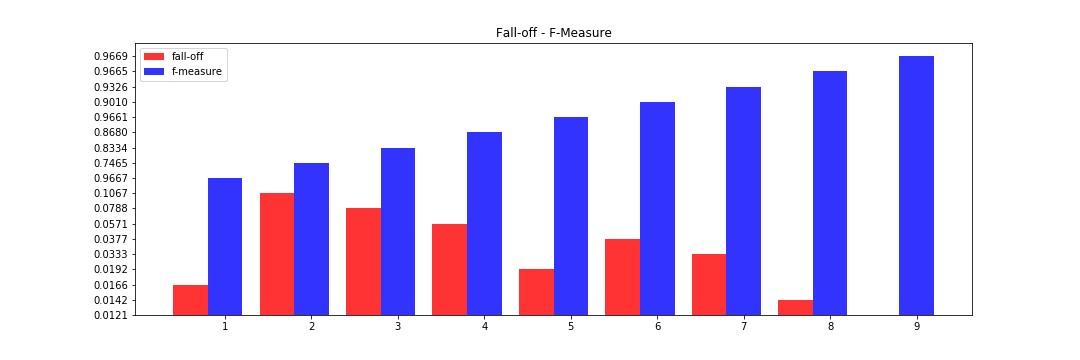

Indice,Onehot,Continuos,Medida,|,Accuracy,Precisión promediada,Precisión ponderada,Recall promediado,Recall ponderado,Fall-off promediado,Fall-off ponderado,F-Measure promediada,F-Measure ponderado
1,No aplica,Fixed,Gain,|,0.9666,0.9696,0.9696,0.9722,0.9666,0.0166,0.0166,0.9696,0.9667
2,No aplica,Fixed,GainRatio,|,0.7666,0.7812,0.7817,0.7848,0.7666,0.1085,0.1067,0.7569,0.7465
3,No aplica,Fixed,ImpurityReduction,|,0.8333,0.8278,0.8368,0.8124,0.8333,0.0773,0.0788,0.8180,0.8334
4,No aplica,Variable,Gain,|,0.8666,0.8974,0.9076,0.8611,0.8666,0.0634,0.0571,0.8582,0.8680
5,No aplica,Variable,GainRatio,|,0.9666,0.9722,0.9694,0.9523,0.9666,0.0175,0.0192,0.9598,0.9661
6,No aplica,Variable,ImpurityReduction,|,0.9,0.8925,0.9114,0.9116,0.9000,0.0448,0.0377,0.8962,0.9010
7,No aplica,C45,Gain,|,0.9333,0.9444,0.9444,0.9333,0.9333,0.0333,0.0333,0.9326,0.9326
8,No aplica,C45,GainRatio,|,0.9666,0.9666,0.97,0.9629,0.9666,0.0158,0.0142,0.9628,0.9665
9,No aplica,C45,ImpurityReduction,|,0.9666,0.9629,0.9703,0.9743,0.9666,0.0151,0.0121,0.9670,0.9669


ModuleNotFoundError: No module named 'getResultsTables.py'; 'getResultsTables' is not a package

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
import getResultsTables.py

##### 3.2.2.2. Resultados generales
***

A continuación se adjunta una comparación general del total de resultados obtenidos, separando por conjunto de datos.

**Notas:**
- Se marca en **celeste** aquellos clasificadores con un mejor desempeño que la mayoría.
- Se marca en **verde** aquellos clasificadores elegidos como los mejores dentro de su grupo.

<table>
    <tr>
        <th>Modelo</th>
        <th>Continuos</th>
        <th>Medida</th>
        <th>|</th>
        <th>Accuracy</th>
        <th>Precision promediada</th>
        <th>Precision ponderada</th>
        <th>Recall promediada</th>
        <th>Recall ponderada</th>
        <th>Fall-off promediada</th>
        <th>Fall-off ponderada</th>
        <th>F-measure promediada</th>
        <th>F-measure ponderada</th>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Fijo</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.873</td>
        <td>0.884</td>
        <td>0.898</td>
        <td>0.889</td>
        <td>0.873</td>
        <td>0.059</td>
        <td>0.060</td>
        <td>0.873</td>
        <td>0.875</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Fijo</td>
        <td>Ratio de Ganancia</td>
        <td>|</td>
        <td>0.893</td>
        <td>0.897</td>
        <td>0.923</td>
        <td>0.906</td>
        <td>0.893</td>
        <td>0.051</td>
        <td>0.048</td>
        <td>0,879</td>
        <td>0,893</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Fijo</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.886</td>
        <td>0.880</td>
        <td>0.920</td>
        <td>0.905</td>
        <td>0.886</td>
        <td>0.050</td>
        <td>0.039</td>
        <td>0,872</td>
        <td>0,888</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Variable</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.906</td>
        <td>0.918</td>
        <td>0.926</td>
        <td>0.912</td>
        <td>0.906</td>
        <td>0.046</td>
        <td>0.047</td>
        <td>0,903</td>
        <td>0,906</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Variable</td>
        <td>Ratio de Ganancia</td>
        <td>|</td>
        <td>0.933</td>
        <td>0.939</td>
        <td>0.944</td>
        <td>0.938</td>
        <td>0.933</td>
        <td>0.033</td>
        <td>0.037</td>
        <td>0,932</td>
        <td>0,933</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Variable</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.920</td>
        <td>0.931</td>
        <td>0.947</td>
        <td>0.932</td>
        <td>0.920</td>
        <td>0.037</td>
        <td>0.030</td>
        <td>0,917</td>
        <td>0,919</td>
    </tr>
    <tr style="background-color: #95dcd4;">
        <td>Árbol</td>
        <td>Maximizando ganancia</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.953</td>
        <td>0.958</td>
        <td>0.964</td>
        <td>0.950</td>
        <td>0.953</td>
        <td>0.022</td>
        <td>0.019</td>
        <td>0,948</td>
        <td>0,953</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Maximizando ganancia</td>
        <td>Ratio de ganancia</td>
        <td>|</td>
        <td>0.946</td>
        <td>0.953</td>
        <td>0.955</td>
        <td>0.950</td>
        <td>0.946</td>
        <td>0.026</td>
        <td>0.025</td>
        <td>0,946</td>
        <td>0,946</td>
    </tr>
    <tr style="background-color: #95dcd4;">
        <td>Árbol</td>
        <td>Maximizando ganancia</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.953</td>
        <td>0.954</td>
        <td>0.957</td>
        <td>0.952</td>
        <td>0.953</td>
        <td>0.023</td>
        <td>0.025</td>
        <td>0,951</td>
        <td>0,953</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Fijo</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.913</td>
        <td>0.930</td>
        <td>0.932</td>
        <td>0.905</td>
        <td>0.913</td>
        <td>0.044</td>
        <td>0.046</td>
        <td>0,906</td>
        <td>0,912</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Fijo</td>
        <td>Ratio de Ganancia</td>
        <td>|</td>
        <td>0.906</td>
        <td>0.909</td>
        <td>0.925</td>
        <td>0.903</td>
        <td>0.906</td>
        <td>0.045</td>
        <td>0.044</td>
        <td>0,892</td>
        <td>0,905</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Fijo</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.906</td>
        <td>0.913</td>
        <td>0.934</td>
        <td>0.918</td>
        <td>0.906</td>
        <td>0.042</td>
        <td>0.034</td>
        <td>0,900</td>
        <td>0,908</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Variable</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.913</td>
        <td>0.904</td>
        <td>0.932</td>
        <td>0.915</td>
        <td>0.913</td>
        <td>0.040</td>
        <td>0.035</td>
        <td>0,900</td>
        <td>0,915</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Variable</td>
        <td>Ratio de Ganancia</td>
        <td>|</td>
        <td>0.900</td>
        <td>0.908</td>
        <td>0.914</td>
        <td>0.903</td>
        <td>0.900</td>
        <td>0.047</td>
        <td>0.046</td>
        <td>0,898</td>
        <td>0,899</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Variable</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.880</td>
        <td>0.869</td>
        <td>0.897</td>
        <td>0.882</td>
        <td>0.880</td>
        <td>0.056</td>
        <td>0.056</td>
        <td>0,866</td>
        <td>0,881</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Maximizando ganancia</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.946</td>
        <td>0.945</td>
        <td>0.953</td>
        <td>0.950</td>
        <td>0.946</td>
        <td>0.025</td>
        <td>0.024</td>
        <td>0,944</td>
        <td>0,946</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Maximizando ganancia</td>
        <td>Ratio de ganancia</td>
        <td>|</td>
        <td>0.927</td>
        <td>0.919</td>
        <td>0.941</td>
        <td>0.915</td>
        <td>0.926</td>
        <td>0.038</td>
        <td>0.042</td>
        <td>0,906</td>
        <td>0,926</td>
    </tr>
    <tr style="background-color: #afdb99;">
        <td>Bosque</td>
        <td>Maximizando ganancia</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.960</td>
        <td>0.965</td>
        <td>0.964</td>
        <td>0.953</td>
        <td>0.960</td>
        <td>0.021</td>
        <td>0.024</td>
        <td>0,955</td>
        <td>0,959</td>
    </tr>
    <caption>Tabla 1 - Resultados de entrenamiento de conjunto <b>Iris</b> para cada configuración paramétrica</caption>
</table>

<table>
    <tr>
        <th>Modelo</th>
        <th>Continuos</th>
        <th>Medida</th>
        <th>|</th>
        <th>Accuracy</th>
        <th>Precision promediada</th>
        <th>Precision ponderada</th>
        <th>Recall promediada</th>
        <th>Recall ponderada</th>
        <th>Fall-off promediada</th>
        <th>Fall-off ponderada</th>
        <th>F-measure promediada</th>
        <th>F-measure ponderada</th>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Fijo</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.635</td>
        <td>0.658</td>
        <td>0.638</td>
        <td>0.385</td>
        <td>0.635</td>
        <td>0.074</td>
        <td>0.222</td>
        <td>0,434</td>
        <td>0,620</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Fijo</td>
        <td>Ratio de Ganancia</td>
        <td>|</td>
        <td>0.685</td>
        <td>0.682</td>
        <td>0.684</td>
        <td>0.430</td>
        <td>0.685</td>
        <td>0.066</td>
        <td>0.195</td>
        <td>0,481</td>
        <td>0,670</td>
    </tr>
    <tr>
        <td>Árbol</td>
        <td>Fijo</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.633</td>
        <td>0.619</td>
        <td>0.633</td>
        <td>0.390</td>
        <td>0.633</td>
        <td>0.075</td>
        <td>0.225</td>
        <td>0,436</td>
        <td>0,618</td>
    </tr>
    <tr style="background-color: #95dcd4;">
        <td>Árbol</td>
        <td>Maximizando ganancia</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.654</td>
        <td>0.651</td>
        <td>0.653</td>
        <td>0.527</td>
        <td>0.654</td>
        <td>0.069</td>
        <td>0.198</td>
        <td>0,555</td>
        <td>0,648</td>
    </tr>
    <tr style="background-color: #95dcd4;">
        <td>Árbol</td>
        <td>Maximizando ganancia</td>
        <td>Ratio de ganancia</td>
        <td>|</td>
        <td>0.693</td>
        <td>0.654</td>
        <td>0.692</td>
        <td>0.491</td>
        <td>0.693</td>
        <td>0.062</td>
        <td>0.171</td>
        <td>0,518</td>
        <td>0,683</td>
    </tr>
    <tr style="background-color: #afdb99;">
        <td>Árbol</td>
        <td>Maximizando ganancia</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.655</td>
        <td>0.652</td>
        <td>0.653</td>
        <td>0.531</td>
        <td>0.655</td>
        <td>0.069</td>
        <td>0.197</td>
        <td>0,556</td>
        <td>0,648</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Fijo</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.609</td>
        <td>0.339</td>
        <td>0.651</td>
        <td>0.390</td>
        <td>0.609</td>
        <td>0.071</td>
        <td>0.154</td>
        <td>0,344</td>
        <td>0,621</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Fijo</td>
        <td>Ratio de Ganancia</td>
        <td>|</td>
        <td>0.600</td>
        <td>0.332</td>
        <td>0.640</td>
        <td>0.389</td>
        <td>0.600</td>
        <td>0.073</td>
        <td>0.162</td>
        <td>0,334</td>
        <td>0,610</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Fijo</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.607</td>
        <td>0.347</td>
        <td>0.648</td>
        <td>0.414</td>
        <td>0.607</td>
        <td>0.072</td>
        <td>0.156</td>
        <td>0,353</td>
        <td>0,618</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Maximizando ganancia</td>
        <td>Ganancia</td>
        <td>|</td>
        <td>0.681</td>
        <td>0.416</td>
        <td>0.705</td>
        <td>0.459</td>
        <td>0.681</td>
        <td>0.060</td>
        <td>0.136</td>
        <td>0,429</td>
        <td>0,689</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Maximizando ganancia</td>
        <td>Ratio de ganancia</td>
        <td>|</td>
        <td>0.680</td>
        <td>0.411</td>
        <td>0.692</td>
        <td>0.433</td>
        <td>0.680</td>
        <td>0.062</td>
        <td>0.152</td>
        <td>0,416</td>
        <td>0,681</td>
    </tr>
    <tr>
        <td>Bosque</td>
        <td>Maximizando ganancia</td>
        <td>Reducción de Impureza</td>
        <td>|</td>
        <td>0.689</td>
        <td>0.438</td>
        <td>0.711</td>
        <td>0.483</td>
        <td>0.689</td>
        <td>0.059</td>
        <td>0.137</td>
        <td>0,454</td>
        <td>0,696</td>
    </tr>
    <caption>Tabla 2 - Resultados de entrenamiento de conjunto <b>CoverType</b> para cada configuración paramétrica</caption>
</table>


### 3.3. Elección y comparación de representantes
***
A continuación se presenta un análisis de los resultados obtenidos, separandose en dos procesos: elección y comparación.

#### 3.3.1. Elección
***
Para determinar cuales fuern los clasificadores con mejor desempeño (denominados "representantes") frente a los posibles candidatos se siguió el siguiente proceso:
1. Se agruparon elementos dada su similitud en base a **accuracy** y *promedios generales* de **precision**, **recall**, **fall-off** y **F-measure**.
2. Una vez obtenidos dichos grupos, se generaron subgrupos acorde a comparaciones entre otros subgrupos y los *promedios ponderados*.
3. Por último, se buscaron desviaciones en los mismos (como malos promedios generales y buenos promedios ponderados, precision y recall bajos para alguna clase, fall-off alto para alguna otra clase, etc.) determinando que *aquellos clasificadores con menos desviaciones serían elegidos como representantes.*

A continuación se adjuntan gráficas que muestran las métricas para cada generadas con el fin de facilitar la lectura, en las mismas se puede apreciar más visualmente una comparación de las métricas obtenidas en cada representante. Se decidió mostrar para cada conjunto al representante elegido y compararlo con los mejores resultados obtenidos para cada modelo (Árbol, Bosque) y para cada estrategia al tratar con atributos continuos (Fijo, Maximizando ganancia).

<div style="margin-top: 16px; margin-bottom: 16px;">
    <div style="display: inline-block; width: 99%; text-align: center;">
        <img src="img/iris.png" />
        <label style="margin-top: 16px; font-size: 16px; font-family: monospace;"> Figura 3.3.1.1. - Comparaciones con el dataset Iris</label>
    </div>
    <div style="display: inline-block; width: 99%; text-align: center;">
        <img src="img/covertype.png" />
        <label style="margin-top: 16px; font-size: 16px; font-family: monospace;"> Figura 3.3.1.2. - Comparaciones con el dataset Covertype</label>
    </div>
</div>


#### 3.3.2. Comparación
***

**Observaciones generales:**

- Sobre los parámetros:
> 1. La *estrategia para interpretar valores continuos* con mejores resultados fue **maximizar la ganancia**, independiente al resto de configuraciones paramétricas.
> 2. Las distintas *medidas de ganancia* no parecen haber incidido de forma notable en los resultados.

- Sobre los resultados:
> 1. Los resultados en *Iris* fueron similares en general.
> 2. Los resultados en *Covertype* también fueron similares, no obstante los árboles ofrecieron un mejor rendimiento de forma consistente.
> 3. Algunos resultados tuvieron una gran diferencia entre sus promedios generales y promedios ponderados (siendo los últimos bastante más altos).
> 4. En *CoverType* los bosques clasifican los elementos de clase 1, 2 y 3 mejor que los árboles. Sin embargo, tienen una muy baja **precision** y muy alto **fall-off** para los elementos de clase 4, 5, 6 y 7. 

Tomando en cuenta la información anterior, se determinó que los mejores clasificadores, a nivel general, fueron **árboles** que partieron atributos continuos en **2 intervalos maximizando la ganancia** y utilizaron **ganancia** o **reducción de impureza** como medida.

Es importante aclarar que dichas elecciones son arbitrarias, aunque se intentó minimizar esta posibilidad. Dadas las características de los conjuntos de entrenamiento y los clasificadores, parece ser coherente que muchos hayan tenido resultados similares aunque trabajaran de forma distinta.

También es importante observar que las evaluaciones utilizadas, especialmente en *CoverType*, pueden estar sujetas a ruido y por tanto ofrecer información "tramposa". El implementar técnicas de análisis estadístico como **Tests de Friedman** entre múltiples evaluaciones para una misma configuración, podría ayudar a reducir esto. También el correr **validaciones cruzadas** en *CoverType* podría dar mejores nociones sobre cada clasificador.

En cualquier caso, a continuación se adjunta una serie de interpretaciones, producto de las observaciones hechas a los resultados. Dichas interpretaciones se basan en fundamentos teóricos y sensaciones empíricas, por lo que no escalan a algo más que eso, interpretaciones.

**Interpretaciones:**

- Sobre los parámetros:
> 1. No se puede decir mucho respecto a la estrategia de **intervalos variables**, ya que sólo fue implementada en *Iris*, el cual cuenta con pocos ejemplos. No obstante, es lógico que la **maximización de ganancia** sea mejor que **intervalos fijos**, ya que ambas estrategias generan solamente 2 intervalos pero la primera siempre genera intervalos con mayor ganancia que la segunda, por lo que el clasificador resultante es mejor.

- Sobre los resultados:
> 1. Muchos de los resultados en *CoverType* no necesariamente reflejan la realidad, esto es debido a la aleatoriedad de la validación (80/20). Una validación cruzada en 10 intervalos (Como la realizada en *Iris*) podría dar un intervalo de certeza  mayor sobre las conjeturas basadas en las interpretaciones de los candidatos.
> 2. La diferencia entre promedios generales y ponderados se da debido a que las clases 4, 5, 6 y 7 cuentan con una mucho menor cantidad de elementos en comparación a las clases 1, 2 y 3. Al tener peor desempeño en las clases de menor proporción, los promedios ponderados dan mejor resultado por darle menos importancia a dichas clases.
> 3. En general las métricas descienden para las clases 4, 5, 6 y 7. Esto podría interpretarse como una dificultad para clasificadores basados en árboles de decisión, ya que parecen tener tendencia por clasificar en clases 1, 2 y 3, las cuales presentan una proporción mucho mayor a las otras clases anteriormente mencionadas.
> 4. Existen otras interpretaciones para justificar las fallas en las clasificaciones de *CoverType*. Por ejemplo, el haber revertido el one-hot encoding, especialmente en el atributo *soil_type*, y haber interpretado dichos atributos como continuos, puede haber impactado notablemente en los resultados, especificamente sobre los de clasificaciones en clases 4, 5, 6 y 7. La cantidad de elementos pertenecientes a las mismas es muy baja y la capacidad de diferenciar con mejor granularidad y menor sesgo inducido sobre el atributo *soil_type* podría haber ayudado a encontrar relaciones entre el mismo y la clasificación del terreno.
> 5. Tomando en cuenta el hecho de que los bosques clasificaron peor los elementos de clase 4, 5, 6 y 7 pero mejor los de clase 1, 2 y 3, puede interpretarse que el clasificar elementos binariamente para cada clase en este tipo de escenarios, es algo contraproducente. Podría ser que la mayoría de clasificaciones acaben en votaciones (a causa de que no ocurre la situación ideal en la cual un árbol clasifique con *True* y los demás con *False*) y en cualquier árbol un resultado *False* da muy poca información (básicamente "no tiene características de elementos de esta clase, pero puede tener características de cualquier otro"). Esto para un conjunto de atributos y clasificaciones con alta complejidad podría acabar disminuyendo enormemente la calidad del clasificador cuando no es fácil detectar atributos con muy baja impureza que determinen fuertemente la pertenencia a una clase.

## 4. Conclusiones
***

#### 4.1. Respecto a los Modelos
***
A

#### 4.2. Respecto a los Atributos
***
A

#### 4.3. Respecto a los Parámetros
***
A

#### 4.4. Respecto a los Resultados
***
A

#### 4.5. Posibles mejoras
***
Para cerrar, se adjunta una lista de mejoras consideradas a la implementación actual:
- A
- A
